<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignments/Assignment1_2021_withsolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Assignment 1

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 1 and 2 (up to and including week 5)

**Due: Sunday November 7, 23.59pm**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the sales of a store.

Run the first few cells to load the dataset and then get started with the questions! 

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit [your Python notebook](https://moodle.unil.ch/mod/assign/view.php?id=841447)
2. Answer the questions to [the quiz on Moodle](https://moodle.unil.ch/mod/quiz/view.php?id=1172387) 
>Note: You can only complete the quiz one time. Have your notebook with the asnwers ready for answering the quiz. 

The answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in slack [channel #assignments](https://app.slack.com/client/T02C4KVGVMX/C02BBA2TFQF).


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

In [274]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [275]:
# Load the data
df=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/sales.csv')

For the first part we use data on the retail sales of a store over several years. The dataset includes information on items purchased from this store, including for each item or article:
* order ID (a unique identifyier of the order through which this item was purchased)
* date of the order
* date the shipment was made
* mode of shipment used (first class, second class, etc.)
* customer ID (unique identifyier of the client)
* customer name
* client segment (consumer, corporate, etc.)
* country, city, state, postal code, region of the client
* product ID, product category, sub-category, and product name
* sales value for purchased items in USD.

## 1. Understand and Clean the Dataset

>1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [276]:
# YOUR CODE HERE
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



### 1.2 Describe the dataset.

>1.2.1. How many observations(rows) and columns are in the dataset?

In [277]:
# YOUR CODE HERE
df.shape

(9800, 18)

<font color="blue">Additional explanation</font>

Or check out below a nice solution from Baptiste Loutan with formatted output.

In [278]:
rows = df.shape[0]
cols = df.shape[1]
print(f"There are {rows} observations caracterised by {cols} attributes")

There are 9800 observations caracterised by 18 attributes


> 1.2.2. For which variable(s), if any, are there missing/null values?

In [279]:
# YOUR CODE HERE
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

>1.2.3. Which state generated the highest demand by *number* of items ordered over the entire period?

In [280]:
# YOUR CODE HERE
df['State'].value_counts().head(3)

California    1946
New York      1097
Texas          973
Name: State, dtype: int64

<font color="blue">Additional explanation</font>

The code above works because each line in our dataset is an order of one product and one item. You can arrive at the same results using a groupby like below.

In [281]:
df.groupby('State')['Product ID'].count().sort_values(ascending=False).head(3)

State
California    1946
New York      1097
Texas          973
Name: Product ID, dtype: int64

>... and which state generated the highest demand by total (aggregated) sales over the entire period?

<font color="blue">Additional explanation</font>

Same idea, this time with groupby (State) and sum by the value of sales.

In [282]:
# YOUR CODE HERE
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(3)

State
California    446306.4635
New York      306361.1470
Texas         168572.5322
Name: Sales, dtype: float64

>1.2.4. What percentage of technology items (Hint: look at Category) were shipped first class (Hint: look at Ship Mode)?

In [283]:
# YOUR CODE HERE
df[(df['Category']=='Technology') & (df['Ship Mode']=='First Class')].shape[0]/df[df['Category']=='Technology'].shape[0]*100

16.381687810259237

<font color="blue">Additional explanation</font>

Or also nice step by step code with formatted printed output from Baptiste Loutan.

In [284]:
technologyItems = df[df.Category == 'Technology'].shape[0]
fClassTechnologyItems = df[(df['Ship Mode'] == 'First Class') & (df.Category == 'Technology')].shape[0]
print(f"There are {fClassTechnologyItems/technologyItems*100:.2f}% of items in the technology class that were shipped 1st class")

There are 16.38% of items in the technology class that were shipped 1st class


### 1.3. Data types and handling missing values

>1.3.1. List the different features and their data type. ¶


In [285]:
# YOUR CODE HERE
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

>1.3.2. Are there any duplicated entries?

In [286]:
df.duplicated().sum()

0

<font color="blue">Additional explanation</font>

Nice alternative code from Paula Heess to be able to identify the duplicated entries (if any at all, none in this case).

In [287]:
df.loc[df.duplicated() == True].size

0

>1.3.3. Change the data type for the following columns: Order Date, Ship Date (from string to datetime), Ship Mode and Segment, from string to category. 

<font color="blue">Additional explanation</font>

Step by step guide to see the curent formatting of the data and how it is encoded when set to datetime.

In [288]:
# YOUR CODE HERE
df['Order Date'].sample(3)

3570    03/07/2018
6612    21/04/2016
9331    29/09/2017
Name: Order Date, dtype: object

In [289]:
# YOUR CODE HERE
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Order Date'].head(2)

0   2017-11-08
1   2017-11-08
Name: Order Date, dtype: datetime64[ns]

In [290]:
# YOUR CODE HERE
df['Ship Date'].sample(3)

4075    20/11/2018
7593    09/09/2017
3861    10/05/2015
Name: Ship Date, dtype: object

In [291]:
# YOUR CODE HERE
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

df["Ship Mode"] =  pd.Categorical(df["Ship Mode"], categories = ['Standard Class', 'Second Class', 'First Class', 'Same Day'], ordered=False)
df["Segment"] =  pd.Categorical(df["Segment"], categories = ['Consumer', 'Corporate', 'Home Office'], ordered=False)
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

<font color="blue">Additional explanation</font>

Or a more compact treatment from Baptiste Loutan with two for loops.

In [292]:
#datetime_cols = ['Order Date', 'Ship Date']
#categorical_cols = ['Ship Mode', 'Segment']

#for dc in datetime_cols:
  #df[dc] = pd.to_datetime(df[dc], format="%d/%m/%Y")

#for cc in categorical_cols:
  #df[cc] = df[cc].astype('category')

#df.dtypes

>1.3.4. For which order period have these data samples been collected? (i.e, the oldest and the most recent order dates in the dataset)

In [293]:
# YOUR CODE HERE
df['Order Date'].describe(datetime_is_numeric=True)[['min', 'max']]

min    2015-01-03 00:00:00
max    2018-12-30 00:00:00
Name: Order Date, dtype: object

<font color="blue">Additional explanation</font>

Or with step by step calculation and nicely formatted output by Baptiste Loutan.

In [294]:
oldest = min(df['Order Date'])
newest = max(df['Order Date'])
print(f"There are orders from {oldest.strftime('%d/%m/%Y')} to {newest.strftime('%d/%m/%Y')}")

There are orders from 03/01/2015 to 30/12/2018


>1.3.5. For the postal code column, drop the missing values and set the data type to an integer and then to a string (make sure the final format of the ZIP code is of this kind: 42420 and not 42420.0).


In [295]:
# YOUR CODE HERE
df.dropna(inplace=True, axis=0)

In [296]:
df['Postal Code'] = pd.to_numeric(df['Postal Code'], downcast='integer').astype('str')
df['Postal Code'].head()

0    42420
1    42420
2    90036
3    33311
4    33311
Name: Postal Code, dtype: object

<font color="blue">Additional explanation</font>

Nice alternative from Paula Heess below. (inserted as inline comments because it this change has already been implemented above)

In [297]:
#df.dropna(axis = 0, inplace=True, subset=['Postal Code'])
#df['Postal Code'] = df['Postal Code'].astype(int)
#df['Postal Code'] = df['Postal Code'].astype(str)
#df['Postal Code'].head()


## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 dates on which the store reached the highest *value* of sales over the entire period included in the dataset?

In [298]:
# YOUR CODE HERE
df.groupby('Order Date')['Sales'].sum().sort_values(ascending=False).head(5)

Order Date
2015-03-18    28106.716
2017-10-02    18452.972
2018-10-22    15158.877
2018-03-23    14816.068
2015-09-08    14228.428
Name: Sales, dtype: float64

>2.2 How many unique customers did the shop have over this period?

In [299]:
# YOUR CODE HERE
df['Customer ID'].nunique()

793

>...Plot the top ten customers by total value of their orders in a horizontal bar chart.

<font color="blue">Additional explanation</font>

Optional for this assignment, but here we plotted both customer id and customer name, just in case we have several customers named Sean Miller.

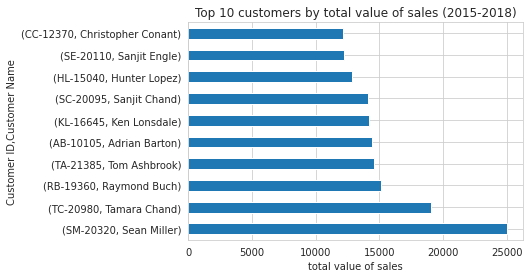

In [300]:
# YOUR CODE HERE
df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 customers by total value of sales (2015-2018)')
plt.xlabel('total value of sales');

>2.3. What are the most frequently bought product sub-categories ? 
>
> Hint: look at sub-category and count the times they appear in the dataset.

In [301]:
# YOUR CODE HERE
df.groupby('Sub-Category')['Sales'].count().sort_values(ascending=False).head()

Sub-Category
Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Name: Sales, dtype: int64

<font color="blue">Additional explanation</font>

Nice alternative from Paula Heess below.

In [302]:
df.loc[:, 'Sub-Category'].value_counts().head()

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Name: Sub-Category, dtype: int64

>...What are the product sub-categories that generated the highest value of sales over the entire period?
>
> Hint: aggregate sales by sub-category.

In [303]:
# YOUR CODE HERE
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head()

Sub-Category
Phones     326487.698
Chairs     322107.531
Storage    217779.102
Tables     202810.628
Binders    200028.785
Name: Sales, dtype: float64

>...What was the average purchase price of a phone sold by the store?

In [304]:
# YOUR CODE HERE
a = df.groupby('Sub-Category')['Sales'].mean() # this is the average price for all the products
a.Phones

373.128797714286

In [305]:
print(f"The average price of a phone sold by the store is USD {a.Phones:.2f}")

The average price of a phone sold by the store is USD 373.13


<font color="blue">Additional explanation</font>

If you do not like to use groupby, check out Paula Heess's solution below

In [306]:
df.loc[df['Sub-Category']=='Phones', 'Sales'].mean()

373.128797714286

>2.4 Create a new column storing the time difference between Ship Date and Order Date. What was the longest, shortest and the average delivery time difference?

In [307]:
# YOUR CODE HERE
df['delivery'] = df['Ship Date'] - df['Order Date']
df.delivery.describe()

count                         9789
mean     3 days 23:04:06.031259577
std      1 days 18:00:39.083391657
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: delivery, dtype: object

> 2.5. How many orders (not items) had a delivery time of 6 or more days? 
>
> Hint: you may want to use [`pd.Timedelta()`](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html).

In [308]:
# YOUR CODE HERE
df[df.delivery>=pd.Timedelta(days=6)].groupby('Order ID')['Order ID'].count().count()

887

<font color="blue">Additional explanation</font>

Taken step by step below, first select order which took 6 or more days to deliver, then group by `Order ID`, to get the list of all such unique orders. In this intermediate step below you see how many items each order included.

Then all you need to do is to count how many such orders you have, hence the last `count`. Your code would end with `sum` if you wanted the number of items which took 6 days or more to deliver.


In [309]:
df[df.delivery >= pd.Timedelta(days=6)].groupby('Order ID')['Order ID'].count()

Order ID
CA-2015-100006    1
CA-2015-100328    1
CA-2015-100363    2
CA-2015-101392    1
CA-2015-102652    4
                 ..
US-2018-166688    3
US-2018-167318    2
US-2018-167570    1
US-2018-168613    1
US-2018-168690    1
Name: Order ID, Length: 887, dtype: int64

<font color="blue">Additional explanation</font>

Check out the alternative code from Louis Tochon

In [310]:
df[df.delivery >= pd.Timedelta(days=6)].groupby('Order ID')['Order ID'].unique()

Order ID
CA-2015-100006    [CA-2015-100006]
CA-2015-100328    [CA-2015-100328]
CA-2015-100363    [CA-2015-100363]
CA-2015-101392    [CA-2015-101392]
CA-2015-102652    [CA-2015-102652]
                        ...       
US-2018-166688    [US-2018-166688]
US-2018-167318    [US-2018-167318]
US-2018-167570    [US-2018-167570]
US-2018-168613    [US-2018-168613]
US-2018-168690    [US-2018-168690]
Name: Order ID, Length: 887, dtype: object

>2.6. What are the average delivery times for each mode of shipment? Take the average over the total number of items ordered (not over the total number of orders).

In [311]:
# YOUR CODE HERE
df.groupby('Ship Mode')['delivery'].describe()

,count,mean,std,min,25%,50%,75%,max
Ship Mode,,,,,,,,
Standard Class,5849,5 days 00:14:16.761839630,1 days 00:15:21.615737915,3 days,4 days,5 days,6 days,7 days
Second Class,1901,3 days 05:59:48.637559179,1 days 04:30:57.722745286,1 days,2 days,3 days,4 days,5 days
First Class,1501,2 days 04:18:04.077281812,0 days 18:34:40.203296376,1 days,2 days,2 days,3 days,4 days
Same Day,538,0 days 01:04:14.275092936,0 days 04:57:33.470165756,0 days,0 days,0 days,0 days,1 days


In [312]:
# this is the average over the number of orders, very slightly different. 
df.pivot_table(index='Order ID',columns=['Ship Mode'],values='delivery',aggfunc='min').describe()

Ship Mode,Standard Class,Second Class,First Class,Same Day
count,2940,943,772,261
mean,5 days 00:03:55.102040816,3 days 05:43:35.058324496,2 days 04:26:44.145077720,0 days 01:06:12.413793103
std,1 days 00:10:00.248926030,1 days 04:09:53.707358504,0 days 18:20:44.943102291,0 days 05:02:09.971082682
min,3 days 00:00:00,1 days 00:00:00,1 days 00:00:00,0 days 00:00:00
25%,4 days 00:00:00,2 days 00:00:00,2 days 00:00:00,0 days 00:00:00
50%,5 days 00:00:00,3 days 00:00:00,2 days 00:00:00,0 days 00:00:00
75%,6 days 00:00:00,4 days 00:00:00,3 days 00:00:00,0 days 00:00:00
max,7 days 00:00:00,5 days 00:00:00,4 days 00:00:00,1 days 00:00:00


>2.7. Create a new column containing the year each order was placed (using Order Date). Then plot the number of unique customers per year in a horizontal bar chart.

In [313]:
# YOUR CODE HERE
df['year']=pd.DatetimeIndex(df['Order Date']).year
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,delivery,year
6875,6876,US-2017-121013,2017-09-05,2017-09-10,Standard Class,MM-17920,Michael Moore,Consumer,United States,Chesapeake,Virginia,23320,South,OFF-LA-10004545,Office Supplies,Labels,Avery 50,25.06,5 days,2017


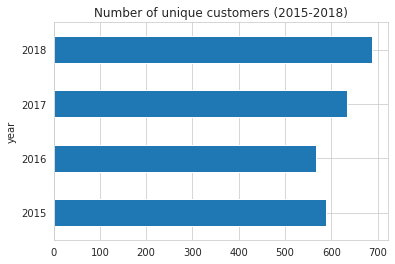

In [314]:
# YOUR CODE HERE
df.groupby('year')['Customer ID'].nunique().plot(kind='barh', title='Number of unique customers (2015-2018)');

>2.8. Churn in 2018 as compared to 2017. Were there any customers in 2017 that the store lost in 2018? If so, how many?

In [315]:
# YOUR CODE HERE

# save list of unique customers in 2018
my2018list=df.loc[df['year']==2018, 'Customer ID'].unique().tolist()

# calculate number of unique customers in 2017
df.loc[df['year']==2017, 'Customer ID'].nunique()

635

In [316]:
# generate loop for counting the number of 2017 customers not among 2018 customers
lost_2018=[]
for i in range(0, 634):
    if df.loc[df['year']==2017, 'Customer ID'].unique()[i] not in my2018list:
          lost_2018.append(df.loc[df['year']==2017, 'Customer ID'].unique()[i])

In [317]:
len(lost_2018)

84

In [318]:
# this is the list of customers lost
print(lost_2018)

['IM-15070', 'GH-14485', 'ON-18715', 'KD-16270', 'ER-13855', 'JD-15895', 'LH-17155', 'RC-19825', 'JL-15850', 'SS-20590', 'MC-18130', 'VD-21670', 'PK-18910', 'KC-16255', 'DE-13255', 'MS-17710', 'CC-12100', 'JS-15940', 'CA-12055', 'SW-20755', 'LD-17005', 'JR-15670', 'MC-17425', 'NP-18685', 'JW-16075', 'VG-21805', 'TB-21280', 'RB-19645', 'BE-11455', 'RM-19375', 'PB-19210', 'CH-12070', 'Co-12640', 'KT-16465', 'RH-19510', 'TC-20980', 'TS-21160', 'RH-19600', 'BT-11440', 'CM-11935', 'CD-12790', 'CM-12235', 'CS-12130', 'JJ-15445', 'AF-10885', 'TT-21265', 'JH-16180', 'RF-19345', 'CS-12490', 'AH-10690', 'MF-17665', 'JS-15880', 'MG-17695', 'PW-19240', 'NF-18475', 'BS-11365', 'CM-12445', 'EH-13990', 'DM-13525', 'LM-17065', 'SP-20650', 'AO-10810', 'MH-17440', 'LD-16855', 'MS-17530', 'SS-20515', 'IM-15055', 'AR-10570', 'SM-20005', 'BS-11665', 'LC-16960', 'MS-17830', 'MP-17470', 'PM-18940', 'DJ-13420', 'RH-19555', 'CJ-11875', 'AB-10015', 'RP-19270', 'CR-12625', 'DF-13135', 'SC-20845', 'SM-20905', 'BT

<font color="blue">Additional explanation</font>

Alternative solution from Baptiste Loutan and Paula Heess (combined solution) below.

In [319]:
# list of unique customers in 2017 and then in 2018
customersIn2017 = df[df.year == 2017]['Customer ID'].unique()
customersIn2018 = df[df.year == 2018]['Customer ID'].unique()

# initiate initial number of lost customers to 0
nbLost = 0
# for loop to count the lost customers
for customer in customersIn2017:
  if not customer in customersIn2018:
    nbLost +=1
  else:
    nbLost +=0

# nice solution for printing out the result
if(nbLost >0):
  print(f"The store has lost {nbLost} customers in 2018 as compared to 2017")
else:
  print("the store didn't lose any customer in 2018 as compared to 2017" )

The store has lost 84 customers in 2018 as compared to 2017


>2.9. Generate a table with the average sales by customer segment and by year (take the simple average over the number of items sold). Plot in a line chart the average sales by customer segement over time, with the years on x-axis, the average sales on the y-axis, and a line for each segment.

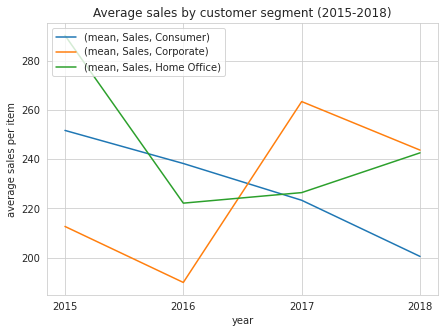

In [320]:
# YOUR CODE HERE
pivot1=df.pivot_table(index='year', columns='Segment', values=['Sales'], aggfunc=['mean'])
axes=pivot1.plot(figsize=(7,5), 
                 xticks=[2015, 2016, 2017, 2018], 
                 title='Average sales by customer segment (2015-2018)', 
                 ylabel='average sales per item')
axes.legend(loc=2);

<font color="blue">Additional explanation</font>

The code above uses the Pandas functionality of plotting a pivot table. However one can also not use pivot tables at all as in the code below from Baptiste Loutan.

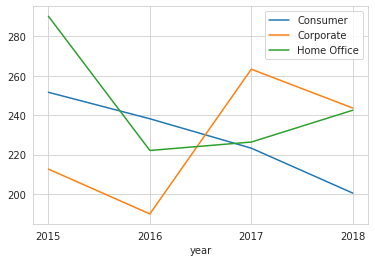

In [321]:
# get the list of years
years = df.year.sort_values().unique()

# get the list of segments
segments = df.Segment.unique()

# calculate the mean to plot with a groupby
meanBySegmentAndYear = df.groupby(['Segment', 'year'])['Sales'].mean()

# then plot the mean by segment
for segment in segments:
  meanBySegmentAndYear[segment].plot(xticks =years).legend(segments)


>2.10. Using `folium`, plot on a map the location of a subset of customers defined below, using circle markers proportionate to the value of their aggregate purchases.
>
> Only include 2018 data for corporate customers with per item purchases above USD 100. 
>
>A separate database with latitude and longitude measures for US zip codes is provided below. Merge the latitude and longitude with your transactions dataset. Make sure to drop any missing values before plotting your map.

In [322]:
# import required packages
import folium

In [323]:
# import latitude and longitude data
latlong=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', 
                    dtype={'ZIP': 'str'})
latlong.head()

,ZIP,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135


In [324]:
# YOUR CODE HERE FOR SELECTING THE SUBSET
subset = df[(df['year']==2018)&(df['Segment']=='Corporate')&(df.Sales>100)]
subset.shape

(369, 20)

In [325]:
# YOUR CODE HERE FOR MERGING THE SUBSET WITH THE LATITUDE AND LONGITUDE DATA
merged=pd.merge(subset,latlong, left_on='Postal Code',right_on='ZIP', how='left')
merged.shape

(369, 23)

In [326]:
merged.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,delivery,year,ZIP,LAT,LNG
0,42,CA-2018-120999,2018-09-10,2018-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,5 days,2018,60540,41.764670,-88.145428
1,144,CA-2018-106180,2018-09-18,2018-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,5 days,2018,94122,37.758797,-122.485128


What happens here is that some postal codes start with 0, such as 02246, but they were read as 2246, thus our merge did not find corresponding latitude and longitude data, so we need to drop these observations. Otherwise use inner merge.

In [327]:
merged.dropna(inplace=True, axis=0)

In [328]:
merged.shape

(351, 23)

In [329]:
# YOUR CODE HERE FOR AGGREGATING THE DATA BY POSTAL CODE
aggregated=merged.groupby(['Postal Code', 'LAT', 'LNG', 'Customer ID', 'Customer Name']).Sales.sum().reset_index()
aggregated.head(2)

,Postal Code,LAT,LNG,Customer ID,Customer Name,Sales
0,10009,40.726399,-73.978631,AC-10615,Ann Chong,2140.876
1,10009,40.726399,-73.978631,AR-10825,Anthony Rawles,347.684


In [330]:
aggregated.shape

(246, 6)

In [331]:
# YOUR CODE HERE FOR GENERATING THE MAP
# Create an empty map
m = folium.Map(location=[40.5, -110.6], tiles="Stamen Toner", zoom_start=4)
 
# Add marker one by one on the map
for i in range(0,len(merged)):
   folium.Circle(
      location=[merged.iloc[i]['LAT'], merged.iloc[i]['LNG']],
      popup=merged.iloc[i]['Customer Name'],
      radius=float(merged.iloc[i]['Sales'])*100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map
m

## 3. Regression Analysis

For this section please work on data aggregated by daily sales in USD. Here we are providing the dataframe for you. The regression dataset contains observations on sales aggregated by day, including:
* the date of the orders
* the number of orders received on that day
* the number of items ordered on that day
* the number of customer segments represented in the orders for that day
* the number of product sub-categories included
* the aggregated value of daily sales in USD
* the year, the month, and the day of the transactions stored separately.

>Load the data.

In [332]:
#Upload the data
new_data=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/regression_sales.csv')

>3.1.1. Generate descriptive statistics

In [333]:
# YOUR CODE HERE
new_data.describe()

,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,4.000000,7.965012,2.004068,5.266884,1832.878285,2016.536208,6.787632,15.794142,6.714374
std,2.799197,6.152745,0.770475,3.016305,2283.923773,1.124801,3.410032,8.781964,1.525230
min,1.000000,1.000000,1.000000,1.000000,2.025000,2015.000000,1.000000,1.000000,0.705570
25%,2.000000,3.000000,1.000000,3.000000,377.736000,2016.000000,4.000000,8.000000,5.934196
50%,3.000000,6.000000,2.000000,5.000000,1053.614000,2017.000000,7.000000,16.000000,6.959981
75%,5.000000,11.000000,3.000000,7.000000,2379.994000,2018.000000,10.000000,23.000000,7.774853
max,19.000000,38.000000,3.000000,14.000000,28106.716000,2018.000000,12.000000,31.000000,10.243764


>3.1.2. Plot the distribution of sales per day, using bins=50. Then create a new column equal to the natural logarithm of sales per day and plot its histogram as well.

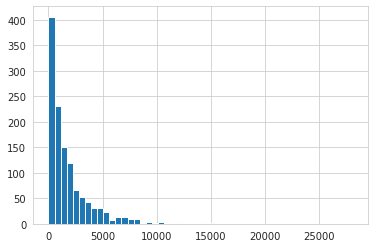

In [334]:
# YOUR CODE HERE
new_data.sales_per_day.hist(bins=50)

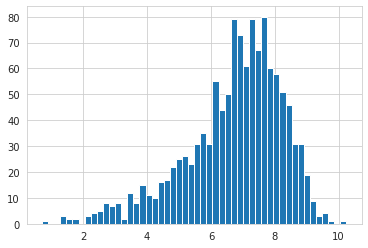

In [335]:
# YOUR CODE HERE
new_data['log_sales']=np.log(new_data['sales_per_day'])
new_data.log_sales.hist(bins=50)

>3.1.3. Create a pairplot with the log of sales per day on the horizontal axis and on the vertical axis the number of items ordered and number of orders.

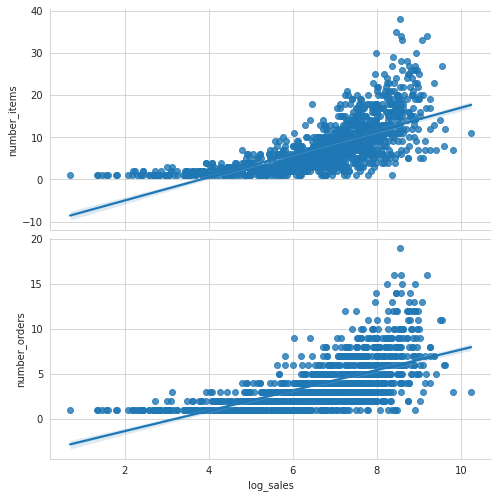

In [336]:
# YOUR CODE HERE
sns.pairplot(new_data, y_vars=['number_items', 'number_orders'],
             x_vars='log_sales', kind='reg', height=3.5, aspect=2)

## Simple Linear Regression

>3.2 Regress log of sales on number of orders, number of items, number of segments, year, month and day.
>
>3.2.1. Select the dependent (y) and the independent variables (X).

In [337]:
# YOUR CODE HERE
y = new_data["log_sales"]
X = new_data[['number_orders', 'number_items', 'number_segments', 'year', 'month', 'day']]

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 77.**

In [338]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [339]:
X_train.head(1)

,number_orders,number_items,number_segments,year,month,day
853,9,19,3,2017,11,5


>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [340]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# check out the regression coefficients
reg.coef_

array([-8.50696759e-02,  1.69065368e-01,  4.93390631e-01,  2.61469395e-03,
       -5.27419820e-03, -1.70831087e-04])

In [341]:
r2 = reg.score(X_test, y_test)
print(f"R2 score = {r2:.4f}")

R2 score = 0.5112


>3.2.4. Predict what would be the total value of sales in USD on 15 January 2019 assuming there were 3 orders received on that day, including 9 items, from 3 segments.

In [342]:
# YOUR CODE HERE
X_new=pd.DataFrame({'number_orders': 3, 'number_items': 9, 'number_segments': 3, 'year': 2019, 'month': 1, 'day': 15}, index=[0])

In [343]:
# YOUR CODE HERE

# this is the predicted value from the model on the logarithmic scale
y_pred = reg.predict(X_new)

# use the inverse of the logarithm (exponential function) to obtain the dollar value of the prediction
y_pred_usd = np.exp(y_pred)[0]

print(f"The predicted value is {y_pred_usd:.2f}")

The predicted value is 1814.43


## Linear Regression with Normalization

> 3.2.5. Apply a standard scaler to the following columns: number_orders, number_items, number_segments. 
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

In [344]:
# YOUR CODE HERE
from sklearn. preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
num_cols=['number_orders', 'number_items', 'number_segments']
scaler=StandardScaler()
preprocessor = ColumnTransformer([('standardization', scaler, num_cols)], remainder='passthrough')

In [345]:
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_train = pd.DataFrame(encodedX_train, columns=X_train.columns)
encodedX_train.head(1)

,number_orders,number_items,number_segments,year,month,day
0,1.862725,1.856302,1.288372,2017.0,11.0,5.0


In [346]:
encodedX_test = preprocessor.transform(X_test)
encodedX_test = pd.DataFrame(encodedX_test, columns=X_test.columns)
encodedX_test.head(1)

,number_orders,number_items,number_segments,year,month,day
0,0.386065,0.856442,1.288372,2015.0,10.0,3.0


<font color="blue">Additional explanation</font>

Alternative without using Column Transformers from Baptiste Loutan (adjusted).

In [347]:
X_train.loc[:, num_cols] = scaler.fit_transform(X_train.loc[:, num_cols], y_train)
X_test.loc[:, num_cols] = scaler.transform(X_test.loc[:, num_cols])

In [348]:
X_test.head(1)

,number_orders,number_items,number_segments,year,month,day
219,0.386065,0.856442,1.288372,2015,10,3


> 3.2.6. Train a linear regression model with the normalised data. What is the R^2 score for the test data?

In [349]:
# YOUR CODE HERE
reg2 = LinearRegression().fit(encodedX_train, y_train)
reg2.coef_

array([-2.30438043e-01,  1.01453418e+00,  3.82567001e-01,  2.61469395e-03,
       -5.27419820e-03, -1.70831087e-04])

In [350]:
reg2.score(encodedX_test, y_test)

0.5112023472494773

> 3.2.7. Predict what would be the total number of sales in USD on 15 January 2019 assuming 3 orders received on that day, including 9 items, from 3 segments

In [351]:
# YOUR CODE HERE
X_new=pd.DataFrame({'number_orders': 3, 'number_items': 9, 'number_segments': 3, 'year': 2019, 'month': 1, 'day': 15}, index=[0])
encodedX_new = pd.DataFrame(preprocessor.transform(X_new))
encodedX_new.columns = ['number_orders', 'number_items', 'number_segments', 'year', 'month', 'day']
y_pred = reg2.predict(encodedX_new)
print(np.exp(y_pred))

[1814.43162377]


>3.2.8. Looking at the coefficients from the linear regression with standardization, identify which variable is the most significant in this model. 

In [352]:
# YOUR CODE HERE
np.max(reg2.coef_)

1.0145341814639945

<font color="blue">Additional explanation</font>

Or, alternatively check out the code using a pandas data frame below from Baptiste Loutan.

In [353]:
coefficients = pd.DataFrame(reg2.coef_, index= X_test.columns, columns=['Coefficients'])
print(coefficients.sort_values(by='Coefficients', ascending=False))

                 Coefficients
number_items         1.014534
number_segments      0.382567
year                 0.002615
day                 -0.000171
month               -0.005274
number_orders       -0.230438


Number of items is the most significant variable.

> 3.2.9. Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: 'number_orders', 'number_items', 'number_segments' and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).

In [354]:
# YOUR CODE HERE
def adjusted_r2(X_test, y_test):
  n=len(y_test)
  k=X_test.shape[1]
  reg = LinearRegression().fit(encodedX_train, y_train)
  r2= reg.score(encodedX_test, y_test)
  adjusted_r2 = 1-((1-r2)*(n-1)/(n-k-1))
  print(f"{adjusted_r2:.4f}")


In [355]:
adjusted_r2(X_test, y_test)

0.4989


Below, results when we drop `number_segments`.

In [356]:
# YOUR CODE HERE
y = new_data["log_sales"]
X = new_data[['number_orders', 'number_items', 'year', 'month', 'day']]
num_cols=['number_orders', 'number_items']
preprocessor = ColumnTransformer([('standardization', scaler, num_cols)], remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_test = preprocessor.transform(X_test)

In [357]:
adjusted_r2(X_test, y_test)

0.4571


Below the results when we drop `number_items`.

In [358]:
# YOUR CODE HERE
y = new_data["log_sales"]
X = new_data[['number_orders', 'number_segments', 'year', 'month', 'day']]
num_cols=['number_orders', 'number_segments']
preprocessor = ColumnTransformer([('standardization', scaler, num_cols)], remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_test = preprocessor.transform(X_test)

In [359]:
adjusted_r2(X_test, y_test)

0.4313


Below the results when we drop `number_orders`.

In [360]:
# YOUR CODE HERE
y = new_data["log_sales"]
X = new_data[['number_items', 'number_segments', 'year', 'month', 'day']]
num_cols=['number_items', 'number_segments']
preprocessor = ColumnTransformer([('standardization', scaler, num_cols)], remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
encodedX_train = preprocessor.fit_transform(X_train)
encodedX_test = preprocessor.transform(X_test)

In [361]:
adjusted_r2(X_test, y_test)

0.4992


Adjusted R2 is highest when we drop the `number_orders` column.